**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from statsmodels.graphics.gofplots import qqplot
# Снимем ограничение на ширину таблицы
pd.set_option('display.max_columns', None)

# Подготовка данных

In [2]:
#Чтение файла в переменную
try:     
    df=pd.read_csv('games.csv')  # Локальный путь
except:        
    df=pd.read_csv('/datasets/games.csv')  # Серверный путь

In [3]:
df.shape

(16715, 11)

In [4]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11820,Rogue Trooper: Quartz Zone Massacre,Wii,2009.0,Shooter,0.06,0.00,0.00,0.01,70.0,8.2,T
6614,Spy Kids Challenger,GBA,2002.0,Platform,0.18,0.07,0.00,0.00,NaN,NaN,NaN
1137,Kinectimals,X360,2010.0,Simulation,1.02,0.46,0.00,0.13,74.0,3.1,E
8164,Naruto Shippuden: Dragon Blade Chronicles,Wii,2009.0,Action,0.11,0.01,0.05,0.01,38.0,3,E10+
11109,Kenka Banchou 2: Full Throttle,PS2,2007.0,Action,0.00,0.00,0.09,0.00,NaN,NaN,NaN


**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# Приведем названия столбцов к нижниму регистру
df.columns=['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df['name'].value_counts()

Need for Speed: Most Wanted                         12
LEGO Marvel Super Heroes                             9
Ratatouille                                          9
Madden NFL 07                                        9
FIFA 14                                              9
                                                    ..
Atari Anniversary Edition Redux                      1
Star Gladiator Episode: I Final Crusade              1
Gitaroo Man                                          1
Puzzle & Dragons X: God Chapter / Dragon Chapter     1
Capcom vs. SNK: Millennium Fight 2000 Pro            1
Name: name, Length: 11559, dtype: int64

In [9]:
# Количество пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
# Процент пропусков
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [11]:
# Удалим строки с пропусками
# 2 игры без названия
#  1.6% данных - игры без года выхода
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['year_of_release'], inplace=True)

In [12]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

**platform**

In [13]:
# Игры для некоторых платформ представлены в еденичном экземпляре
df.platform.value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

**year_of_release**

In [14]:
# Приведем год в пит дататайм
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

In [15]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**user_score**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.5+ MB


In [17]:
df.user_score.unique()  

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце рейтинг пользователя есть значения "tbd" (To Be Determined, то есть "Будет определено" ),
это делает столбец, типом объект.

Заменим 'tbd' на 'nan' и преобразуем столбец в тип флоат.

In [18]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score']=df['user_score'].astype('float')

In [19]:
df.user_score.unique()     

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [20]:
# Суммарные продажи во всех регионах
df['sum_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [21]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
8779,Project Sylpheed: Arc of Deception,X360,2006-01-01,Shooter,0.12,0.01,0.02,0.01,64.0,8.6,T,0.16
2679,Driv3r,XB,2004-01-01,Racing,0.36,0.38,0.00,0.03,56.0,4.7,M,0.77
6889,Dreamcast Collection,X360,2011-01-01,Misc,0.16,0.06,0.00,0.02,53.0,5.2,T,0.24
352,FIFA Soccer 10,PS3,2009-01-01,Sports,0.60,2.45,0.05,0.52,91.0,7.6,E,3.62
848,Fire Emblem: Awakening,3DS,2012-01-01,Role-Playing,0.90,0.45,0.54,0.13,92.0,9.1,T,2.02


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
sum_sales          16444 non-null float64
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.6+ MB


В данных имеются пропуски в оценках критиков (50%), пользователей(40%) и рейтинге(40%)

In [23]:
df.query('critic_score== "NaN" and user_score=="NaN"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005-01-01,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


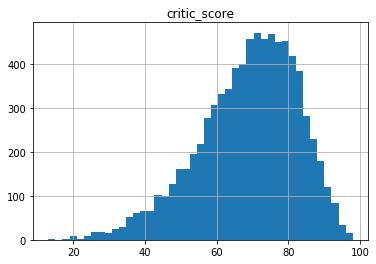

In [24]:
df.hist('critic_score', bins=43);

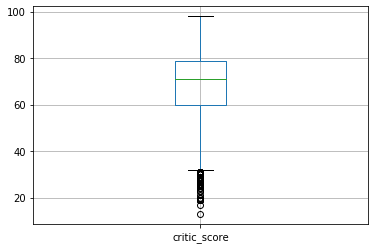

In [25]:
df.boxplot(['critic_score']);

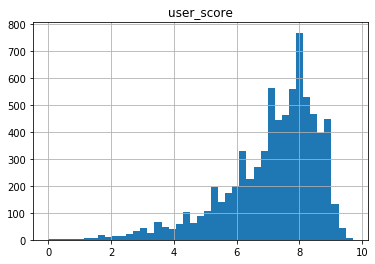

In [26]:
df.hist('user_score', bins=43);

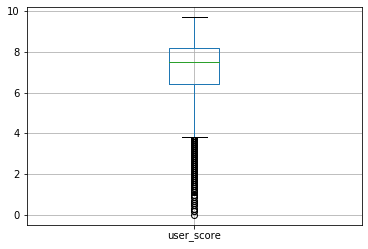

In [27]:
df.boxplot(['user_score']);

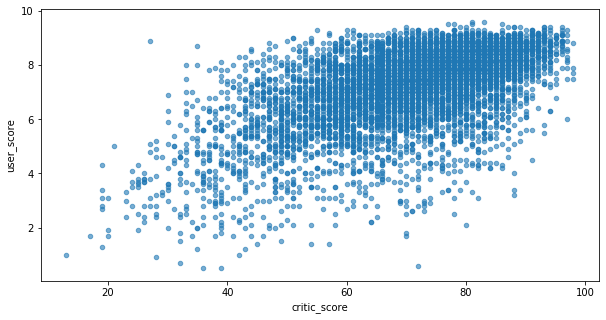

In [28]:
df.plot(x='critic_score', y='user_score',  kind='scatter', figsize=(10,5), alpha=0.6);


In [29]:
# Имеется прямая зависимость между оценкой критиков и пользователей.
df['critic_score'].corr(df['user_score'])

0.5796706281932216

In [30]:
# Поиск явных дубликатов
df.duplicated().sum()

0

## Вывод

- Привели названия столбцов к нижнему регистру.
- Привели столбец с датой к типу дататайм.
- Столбцы name, platform, genre, rating оставили в типе объект, тк в них содержатся строковые значения.  
- Столбцы с продажами и рейтингами оставили в типе флоат, тк там необходимы дробные значения.
- 50% значений столбцов с рейтингом, отсутствуют, часть из них в процессе ожидания рейтинга. Заполнять рейтинги какимии либо значениями считаю нецелесообразным (тк % отсутствующих значений очень велик)
- Посчитали суммарные продажи во всех регионах.


#  Исследовательский анализ данных

## Сколько игр выпускалось в разные годы

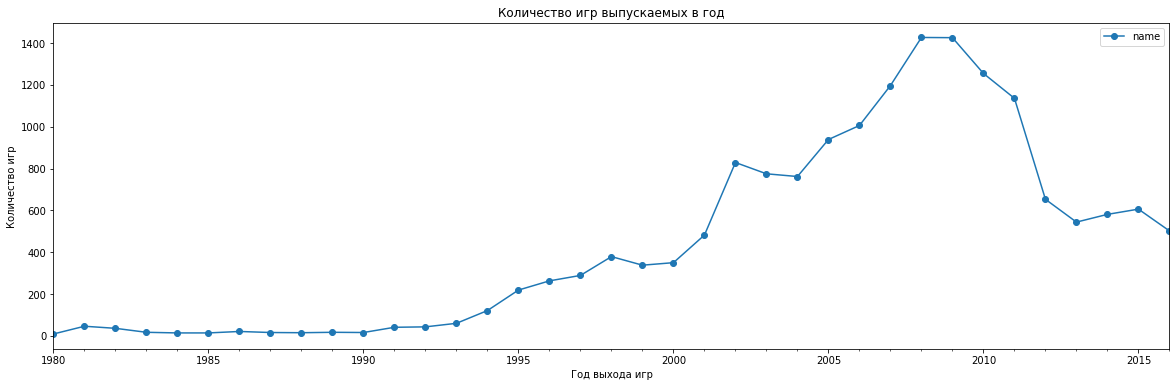

In [31]:
(df.groupby(['year_of_release'])['name']
    .count().reset_index()
    .plot(x='year_of_release', y='name',style='o-', figsize=(20,6)));

plt.title('Количество игр выпускаемых в год');
plt.xlabel("Год выхода игр");
plt.ylabel("Количество игр");  


До 95 года количество игр было несущественным, затем идет рост до конца 2000-ых, затем спад, возможно, связанный с ростом популярности игр для телефонов.

## Как менялись продажи по платформам

In [32]:
df.pivot_table(index='platform', columns='year_of_release', values='sum_sales', aggfunc='sum', fill_value='-')

year_of_release,1980-01-01,1981-01-01,1982-01-01,1983-01-01,1984-01-01,1985-01-01,1986-01-01,1987-01-01,1988-01-01,1989-01-01,1990-01-01,1991-01-01,1992-01-01,1993-01-01,1994-01-01,1995-01-01,1996-01-01,1997-01-01,1998-01-01,1999-01-01,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3DO,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.02,0.08,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3DS,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,63.2,51.36,56.57,43.76,27.78,15.14
DC,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3.38,5.16,5.99,1.07,0.29,-,-,-,-,0.02,0.04,-,-,-,-,-,-,-,-
DS,-,-,-,-,-,0.02,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,-,-,-
GB,-,-,-,-,-,-,-,-,1.43,64.97,4.89,5.57,25.49,-,12.18,3.6,36.03,6.37,26.9,38,19.76,9.24,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
GBA,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.4,-,-,-,-,-,-,-,-,-
GC,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,26.34,51.81,50.61,28.82,27.62,11.26,0.27,-,-,-,-,-,-,-,-,-
GEN,-,-,-,-,-,-,-,-,-,-,2.6,4.33,12.64,0.65,8.13,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [33]:
# Выделим платформы с наибольшими суммарными продажами
top10_platforms =df.groupby(['platform'])['sum_sales'].sum().reset_index().sort_values(by='sum_sales', ascending=False).head(10)
top10_platforms

,platform,sum_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


In [34]:
platform_pivot_table_years = df.pivot_table(index=['platform','year_of_release'], values = 'sum_sales', aggfunc = 'sum').reset_index()
platform_pivot_table_years.sample(5)

,platform,year_of_release,sum_sales
167,PSP,2014-01-01,0.24
13,3DS,2012-01-01,51.36
7,2600,1987-01-01,1.94
51,GBA,2002-01-01,74.16
46,GB,1999-01-01,38.00


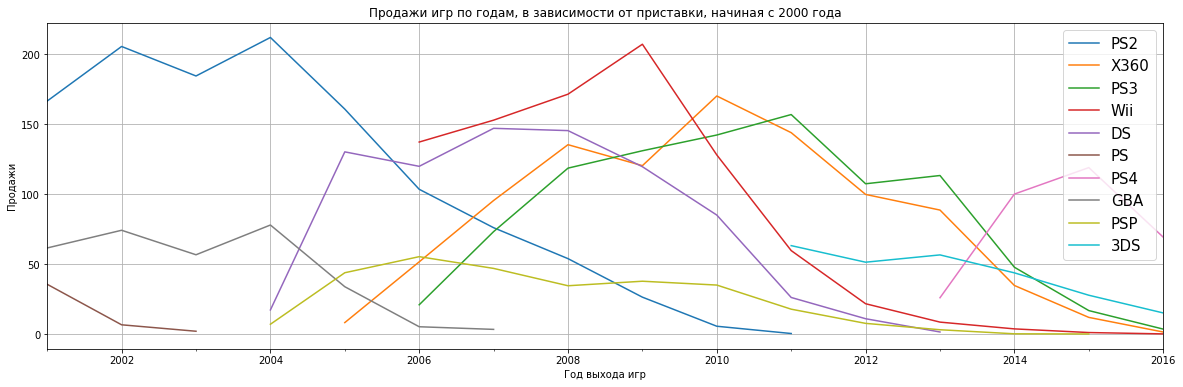

In [35]:
fig, ax = plt.subplots(figsize =(20,6));

for i in top10_platforms['platform']:
    platform_pivot_table_years.query('platform==@i and year_of_release>2000' ).plot(x='year_of_release', y='sum_sales',grid=True, ax=ax);
    
ax.legend(top10_platforms['platform'],prop = {'size':15});
plt.title('Продажи игр по годам, в зависимости от приставки, начиная с 2000 года');
plt.xlabel("Год выхода игр");
plt.ylabel("Продажи");   

Выделим период после 2014 года

In [36]:
good_period=df.query('year_of_release>=2014')

good_period_pivot_table = good_period.pivot_table(index=['platform','year_of_release'], values = 'sum_sales', aggfunc = 'sum').reset_index()
#good_period_pivot_table

In [37]:
list(good_period_pivot_table['platform'].unique())

['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

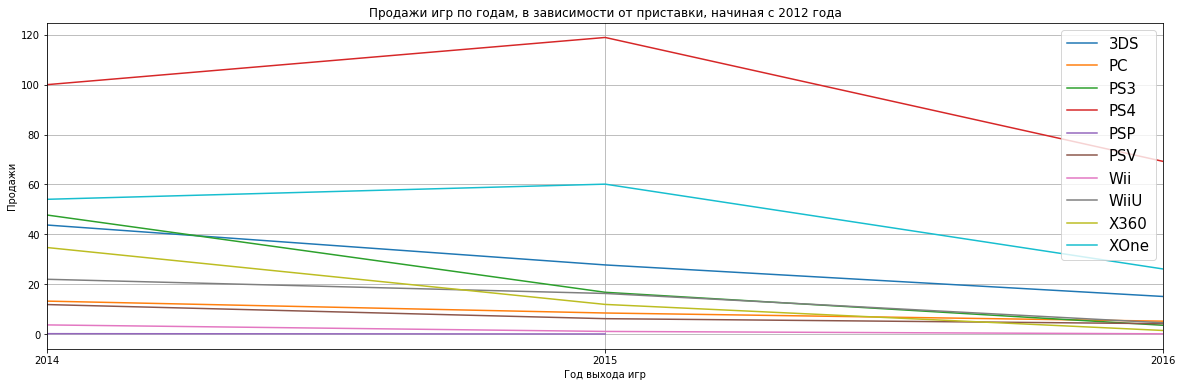

In [38]:
fig, ax = plt.subplots(figsize =(20,6));

for i in list(good_period_pivot_table['platform'].unique()):
    good_period_pivot_table.query('platform==@i' ).plot(x='year_of_release', y='sum_sales',grid=True, ax=ax);
    
ax.legend(list(good_period_pivot_table['platform'].unique()),prop = {'size':15});
plt.title('Продажи игр по годам, в зависимости от приставки, начиная с 2012 года');
plt.xlabel("Год выхода игр");
plt.ylabel("Продажи");   

In [39]:
 # Выберем 5 перспективных платформ
promising_platform=['3DS','PS3','PS4','PC','XOne']
#good_period_promising_platform=good_period_pivot_table.query(
#    'platform=="3DS" or platform=="PS3" or platform=="PS4" or platform=="PC" or platform=="XOne" '  )

In [40]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


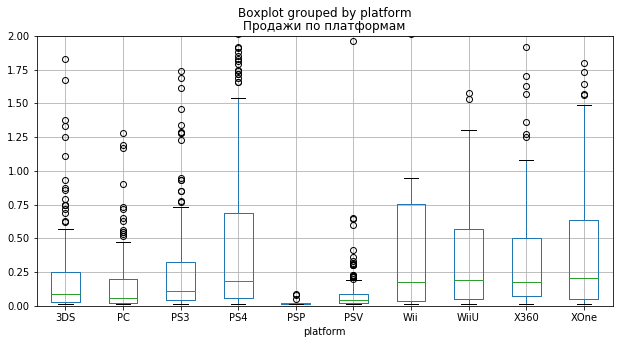

In [41]:

df.query('year_of_release>=2014').boxplot('sum_sales', by='platform', figsize=(10,5));
plt.ylim(0,2)
plt.title('Продажи по платформам');

In [42]:
# В дальнейшем будем использовать выбранный период.
df=df.query('year_of_release>=2014')

## Влияние оценок на продажи

Для подробного анализа выбираем приставку PS4, как одну из самых новых, иимеющую самые высокие продажи, за выбранный период.

In [43]:
PS4=df.query('platform=="PS4" ')

Коэффициент корреляции Пирсона:  0.4026614106810409


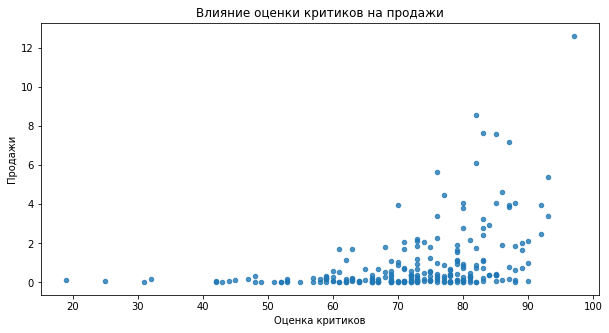

In [44]:
PS4.plot(x='critic_score', y='sum_sales',  kind='scatter', figsize=(10,5), alpha=0.8);
plt.title('Влияние оценки критиков на продажи');
plt.xlabel("Оценка критиков");
plt.ylabel("Продажи");
print('Коэффициент корреляции Пирсона: ',PS4['critic_score'].corr(df['sum_sales']));

Коэффициент корреляции Пирсона:  -0.04013158947269733


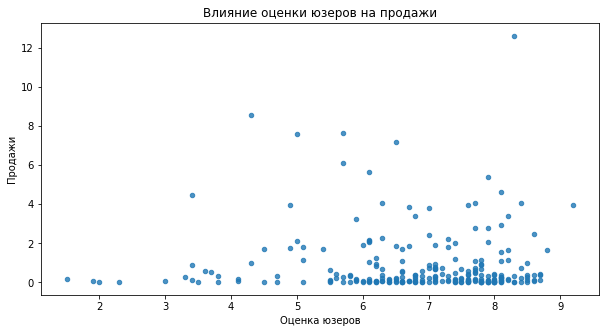

In [45]:
PS4.plot(x='user_score', y='sum_sales',  kind='scatter', figsize=(10,5), alpha=0.8);
plt.title('Влияние оценки юзеров на продажи');
plt.xlabel("Оценка юзеров");
plt.ylabel("Продажи");
print('Коэффициент корреляции Пирсона: ',PS4['user_score'].corr(df['sum_sales']));

На примере приставки PS4 видно, что, существует умеренная зависимость продаж от оценки критиков (Коэффициент корреляции Пирсона:  0.4)

При этом оценка пользователей не влияет на продажи.

In [46]:
df['critic_score'].corr(df['sum_sales'])

0.32810508696636315

In [47]:
df['user_score'].corr(df['sum_sales'])

-0.013070305002484557

Данные по всем платформам подтверждаются данными для PS4, есть небольшая зависимоть продаж от оценки критиков, а, оценка пользователей не влияет на продажи.

## Распределение игр по жанрам

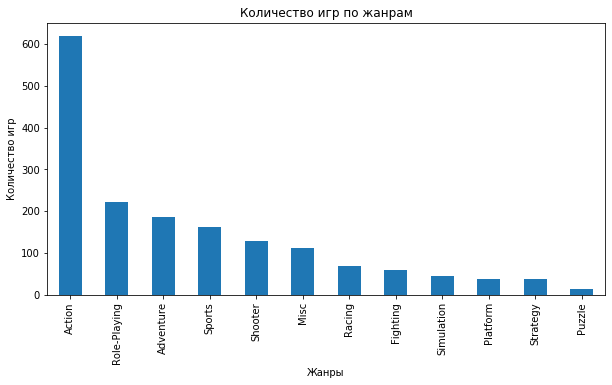

In [48]:
df.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar',figsize =(10,5));
plt.title('Количество игр по жанрам');
plt.xlabel("Жанры");
plt.ylabel("Количество игр");

По количеству игр, с большим отрывом лидирует жанр - Экшон, затем идут ролевые игры, приключеня и спорт.

На последнем месте Пазлы)

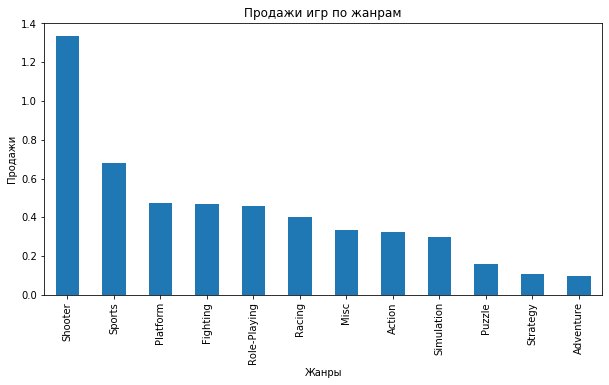

In [49]:
df.groupby('genre')['sum_sales'].mean().sort_values(ascending=False).plot(kind='bar', figsize =(10,5));
plt.title('Продажи игр по жанрам');
plt.xlabel("Жанры");
plt.ylabel("Продажи");

## Вывод

Был проведен исследовательский анализ данных и получены следующие результаты:
- В разные годы выпускалось разное количество игр, данными до 2000 года можно пренебреч
- Срок жизни платформы примерно 10 лет, есть периоды роста, стабильности и спада продаж
- Оценка критиков влияет на продажи, а оценка пользователей, нет
- По количеству игр, с большим отрывом лидирует жанр - Экшон, затем идут ролевые игры, приключеня и спорт. На последнем месте Пазлы)
- По продажам на первом месте Шутеры , на втором спорт, в конце приключения.

# Портрет пользователя каждого регона

## Самые популярные платформы в разных регионах

In [50]:
region=['na_sales','eu_sales','jp_sales']

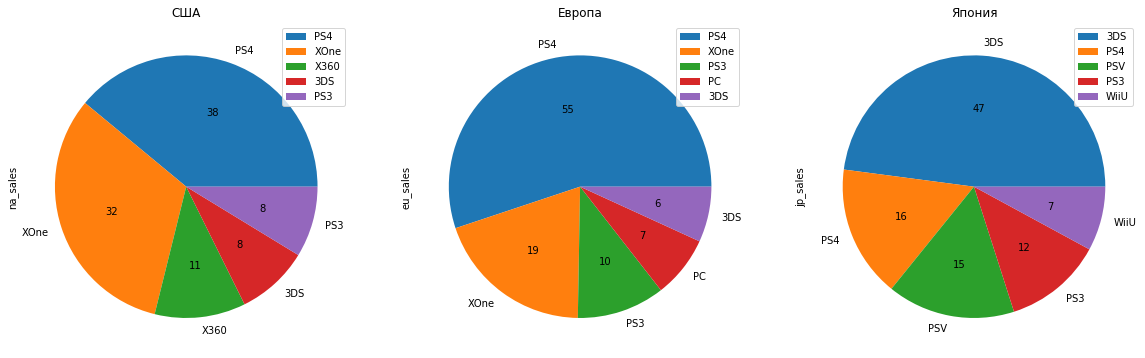

In [51]:
fig, axes = plt.subplots(1,3,figsize=(20,10));
a=0
for i in region:
    (
    df.groupby(by='platform')
        .agg({i:'sum'})
        .sort_values(by=i, ascending=False)
        .head(5)
        .plot(kind='pie',y=i, autopct='%d',ax=axes[a] )
    );
    a+=1
axes[0].set(title='США');
axes[1].set(title='Европа');
axes[2].set(title='Япония');

Самые популярные платформы:
- США: XBox (доля рынка 27%)
- Европа: PS4 (доля рынка 33%)
- Япония: 3DS (доля рынка 50%)

## Самые популярные жанры в разных регионах

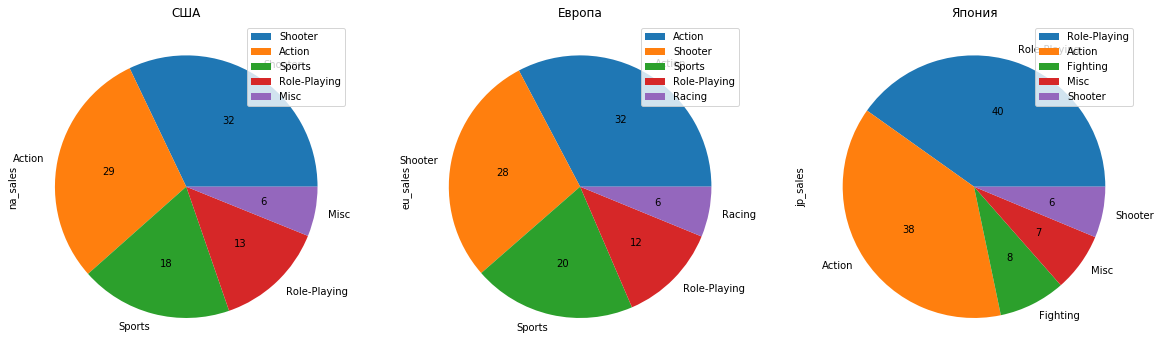

In [52]:
fig, axes = plt.subplots(1,3,figsize=(20,10));
a=0

for i in region:
    (
    df.groupby(by='genre')
        .agg({i:'sum'})
        .sort_values(by=i, ascending=False)
        .head(5)
        .plot(kind='pie',y=i, autopct='%d',ax=axes[a])
    );
    a+=1
axes[0].set(title='США');
axes[1].set(title='Европа');
axes[2].set(title='Япония');

Самые популярные жанры:
- США: Экшон + Стрелялки  (доля рынка 35+ 28 %)
- Европа: Экшон + Стрелялки  (доля рынка 38+ 27 %)
- Япония: Ролевухи (доля рынка 43%)

В целом, США и европа очень похожи по предпочтениям в жанрах, японя сильно отличается.

## Влияние рейтинга ESRB

In [53]:
df['rating'].isna().sum()

749

In [54]:
df['rating'].unique()

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

In [55]:
df['rating']=df['rating'].fillna('no rating')

C:\Users\SanSanix\anaconda3\envs\praktikum_env_win_new\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df['rating'].isna().sum()


0

In [57]:
esrb = df.pivot_table(index = ['rating'], values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['mean'])
esrb

mean                    
           eu_sales  jp_sales  na_sales
rating                                 
E          0.265114  0.040822  0.231689
E10+       0.141405  0.024108  0.179622
M          0.352604  0.030226  0.363849
T          0.125720  0.054539  0.143727
no rating  0.078705  0.075968  0.086409

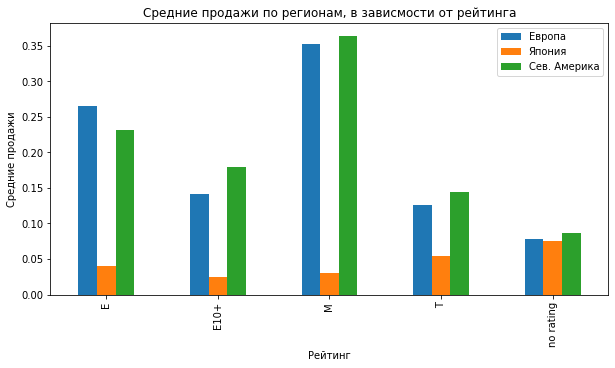

In [58]:
esrb.plot(kind='bar',figsize =(10,5));
plt.title('Средние продажи по регионам, в зависмости от рейтинга');
plt.xlabel("Рейтинг");
plt.ylabel("Средние продажи");
plt.legend(['Европа','Япония', 'Сев. Америка']);

- «E» («Everyone») — «Для всех»
- «M» («Mature») — «От 17 лет»
- «T» («Teen») — «Подросткам 13—19 лет»
- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»

## Вывод
В японии игры без рейтинга продаются лучше чем с рейтингом.

В США и европе, игры без рейтинга продаются хуже, самый популярный рейтинг М.


# Проверка гипотез

In [59]:
df_test=df.dropna()

Проверим распределения на нормальность

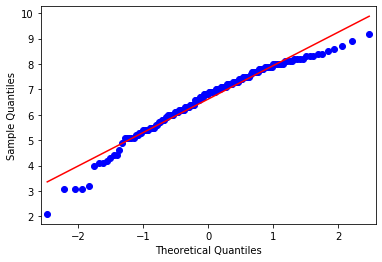

151

In [60]:
qqplot(df_test.query('platform== "XOne"')['user_score'], line='s')
plt.show()
df_test.query('platform== "XOne"')['user_score'].count()

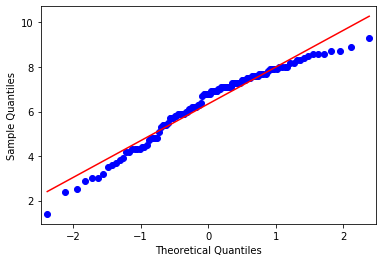

115

In [61]:
qqplot(df_test.query('platform== "PC"')['user_score'], line='s')
plt.show()
df_test.query('platform== "PC"')['user_score'].count()

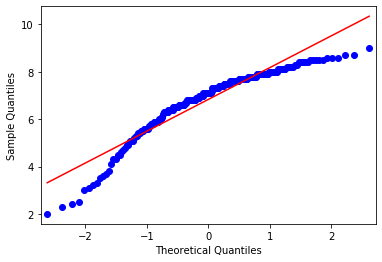

227

In [62]:
qqplot(df_test.query('genre== "Action"')['user_score'], line='s')
plt.show()
df_test.query('genre== "Action"')['user_score'].count()

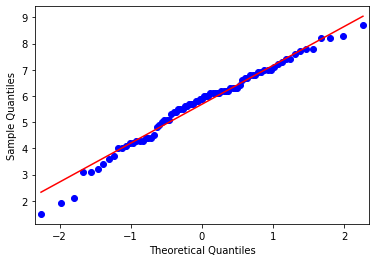

83

In [63]:
qqplot(df_test.query('genre== "Sports"')['user_score'], line='s')
plt.show()
df_test.query('genre== "Sports"')['user_score'].count()

Распределения не идеальной нормальности, но в каждом больше 100 значений, это подойдет дя нашего анализа.

Применим t-критерий Стьюдента, тк нам нужно проверить гипотезы о равенстве 2х средних значений в 2х выборках.

In [64]:
# Зададим пороговое значение
alpha = 0.05

H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [65]:
results = st.ttest_ind(
    df_test.query('platform== "XOne"')['user_score'], 
    df_test.query('platform== "PC"')['user_score'],
    equal_var = True)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.12817793652639856
Не получилось отвергнуть нулевую гипотезу


H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H_1: Средние пользовательские рейтинги жанров Action и Sports разные

In [66]:
results = st.ttest_ind(
    df_test.query('genre== "Action"')['user_score'], 
    df_test.query('genre== "Sports"')['user_score'],
    equal_var = True)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.0540895999943536e-10
Отвергаем нулевую гипотезу


## Вывод
Предполагаем, что, средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Предполагаем, что, средние пользовательские рейтинги жанров Action и Sports разные


# Общий вывод

Подготовка данных
- Привели названия столбцов к нижнему регистру.
- Привели столбец с датой к типу дататайм.
- Столбцы name, platform, genre, rating оставили в типе объект, тк в них содержатся строковые значения.  
- Столбцы с продажами и рейтингами оставили в типе флоат, тк там необходимы дробные значения.
- 50% значений столбцов с рейтингом, отсутствуют, часть из них в процессе ожидания рейтинга. Заполнять рейтинги какимии либо значениями считаю нецелесообразным (тк % отсутствующих значений очень велик)
- Посчитали суммарные продажи во всех регионах.

Был проведен исследовательский анализ данных и получены следующие результаты:
- В разные годы выпускалось разное количество игр, данными до 2000 года можно пренебреч
- Срок жизни платформы примерно 10 лет, есть периоды роста, стабильности и спада продаж
- Оценка критиков влияет на продажи, а оценка пользователей, нет
- По количеству игр, с большим отрывом лидирует жанр - Экшон, затем идут ролевые игры, приключеня и спорт. На последнем месте Пазлы)
- По продажам на первом месте Шутеры , на втором спорт, в конце приключения.

Рынки США и европы очень похожи, рынок Японии сильно отличается.

Были проверены следующие гипотезы:
- Предполагаем, что, средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Предполагаем, что, средние пользовательские рейтинги жанров Action и Sports разные